In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance as yf 



In [2]:
start= '2018-01-01'
end= '2023-12-31'
stock= 'GOOG'
data= yf.download(stock,start,end)


[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,52.417000,53.347000,52.261501,53.250000,53.189472,24752000
1,2018-01-03,53.215500,54.314499,53.160500,54.124001,54.062481,28604000
2,2018-01-04,54.400002,54.678501,54.200100,54.320000,54.258255,20092000
3,2018-01-05,54.700001,55.212502,54.599998,55.111500,55.048855,25582000
4,2018-01-08,55.111500,55.563499,55.081001,55.347000,55.284088,20952000
...,...,...,...,...,...,...,...
1504,2023-12-22,142.130005,143.250000,142.054993,142.720001,142.557770,18494700
1505,2023-12-26,142.979996,143.945007,142.500000,142.820007,142.657669,11170100
1506,2023-12-27,142.830002,143.320007,141.050995,141.440002,141.279236,17288400
1507,2023-12-28,141.850006,142.270004,140.828003,141.279999,141.119415,12192500


In [5]:
ma_100_days= data.Close.rolling(100).mean()

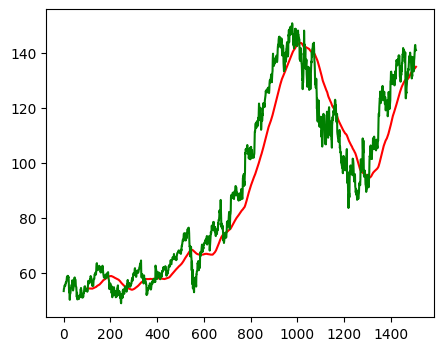

In [6]:
plt.figure(figsize=(5,4))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [7]:
ma_200_days= data.Close.rolling(200).mean()

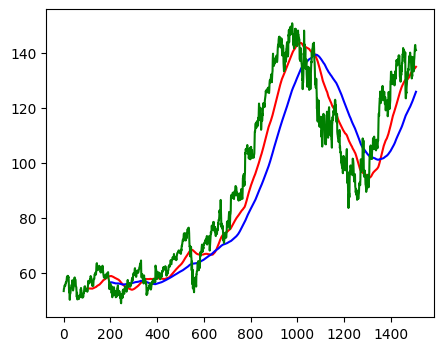

In [8]:
plt.figure(figsize=(5,4))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')

plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train= pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test= pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [11]:
data_train.shape

(1207, 1)

In [12]:
data_test.shape

(302, 1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))


In [14]:
data_train_scale= scaler.fit_transform(data_train)

In [15]:
x=[]
y=[]

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [16]:
x,y=np.array(x),np.array(y)

In [17]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [18]:
model= Sequential()
model.add(LSTM(units=50, activation= 'relu', return_sequences= True, input_shape=((x.shape[1],1))))

model.add(Dropout(0.2))

model.add(LSTM(units=60, activation= 'relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation= 'relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

C:\Users\kkrav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x,y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 34s 740ms/step - loss: 0.1445
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 40s 698ms/step - loss: 0.0173
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 23s 668ms/step - loss: 0.0121
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 27s 259ms/step - loss: 0.0128
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 267ms/step - loss: 0.0092
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 204ms/step - loss: 0.0087
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - loss: 0.0084
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - loss: 0.0086
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - loss: 0.0105
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - loss: 0.0081
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - loss: 0.0090
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - loss: 0.0070
Epoch 13/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - loss: 0.0067
Epoch 14/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - loss: 0.0083
Epoch 15/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step 

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [21]:
past_100_days=data_train.tail(100)

In [22]:
data_test= pd.concat([past_100_days, data_test],ignore_index= True)


In [23]:
data_test_scale= scaler.fit_transform(data_test)

In [24]:
x=[]
y=[]

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

x,y=np.array(x), np.array(y)

In [25]:
y_predict= model.predict(x)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step


In [26]:
scale= 1/scaler.scale_

In [27]:
y_predict=y_predict*scale

In [28]:
y=y*scale

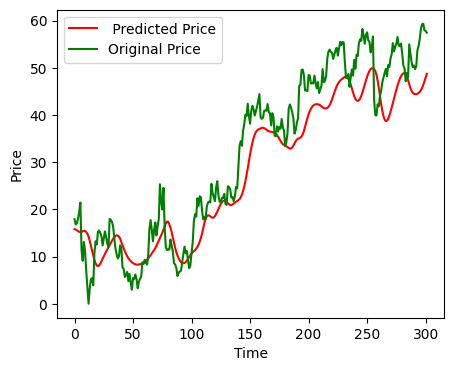

In [29]:
plt.figure(figsize=(5,4))
plt.plot(y_predict, 'r', label=' Predicted Price')
plt.plot(y, 'g', label= 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [30]:
model.save('Stock prediction model.keras')